In [4]:
#Installing packaging + seed, CMD+enter to run the code
pkgs<-c("dplyr", "ggplot2")
for (p in pkgs){
  if (!require(p,character.only = TRUE)) install.packages(p)
}

library(dplyr)
library(ggplot2)
set.seed(1)

In [5]:
#Upload data file + see what files are there
list.files("/content")

[1] "retail_segmentation.csv"     "retail_segmentation.numbers"
[3] "sample_data"

To apply the dataset to seg

In [8]:
seg <- read.csv("/content/retail_segmentation.csv")
head(seg)

,Cust_No,avg_order_size,avg_order_freq,crossbuy,multichannel,per_sale,tenure,return_rate,married,own_home,household_size,loyalty_card,income,age,avg_mktg_cnt,zip_code
,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
1,1,23.400000,2.2222222,3,2,0.00000000,3,0.1175214,1,1,1,1,35,47,56.000000,21230
2,2,34.260377,6.6250000,7,2,0.11111111,35,0.2818684,1,1,3,1,140,70,14.914286,22301
3,3,43.575641,4.8750000,5,2,0.07407407,12,0.2741769,1,0,4,0,35,21,20.083333,19002
4,4,26.316667,0.9000000,4,2,0.25000000,9,0.1435508,0,0,1,1,35,62,8.222222,22304
5,5,8.269231,1.0833333,3,1,0.50000000,40,0.0000000,0,0,2,0,140,21,1.350000,20124
6,6,21.500000,0.2222222,1,2,0.00000000,7,0.0000000,0,1,1,1,80,21,2.714286,22033


We structure the data

In [9]:
str(seg) #structure the dataset

'data.frame':	2000 obs. of  16 variables:
 $ Cust_No       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ avg_order_size: num  23.4 34.26 43.58 26.32 8.27 ...
 $ avg_order_freq: num  2.22 6.62 4.88 0.9 1.08 ...
 $ crossbuy      : int  3 7 5 4 3 1 2 3 1 1 ...
 $ multichannel  : int  2 2 2 2 1 2 1 2 1 1 ...
 $ per_sale      : num  0 0.1111 0.0741 0.25 0.5 ...
 $ tenure        : int  3 35 12 9 40 7 8 17 14 3 ...
 $ return_rate   : num  0.118 0.282 0.274 0.144 0 ...
 $ married       : int  1 1 1 0 0 0 1 0 0 0 ...
 $ own_home      : int  1 1 0 0 0 1 0 1 1 1 ...
 $ household_size: int  1 3 4 1 2 1 1 1 2 8 ...
 $ loyalty_card  : int  1 1 0 1 0 1 0 1 1 1 ...
 $ income        : int  35 140 35 35 140 80 70 35 35 35 ...
 $ age           : int  47 70 21 62 21 21 86 70 57 21 ...
 $ avg_mktg_cnt  : num  56 14.91 20.08 8.22 1.35 ...
 $ zip_code      : int  21230 22301 19002 22304 20124 22033 8757 8109 21122 21208 ...


In [14]:
vars <- c("avg_order_size", "avg_order_freq", "crossbuy", "multichannel", "per_sale", "tenure", "avg_mktg_cnt", "return_rate")
#c --> extract the columns
x <- seg[,vars] #extract the columns from the dataset
x_scaled <- scale(x) #scale the variables

Interpretation: We take 6 groups. We have clearly 6 differents types of groups (see the elbow).

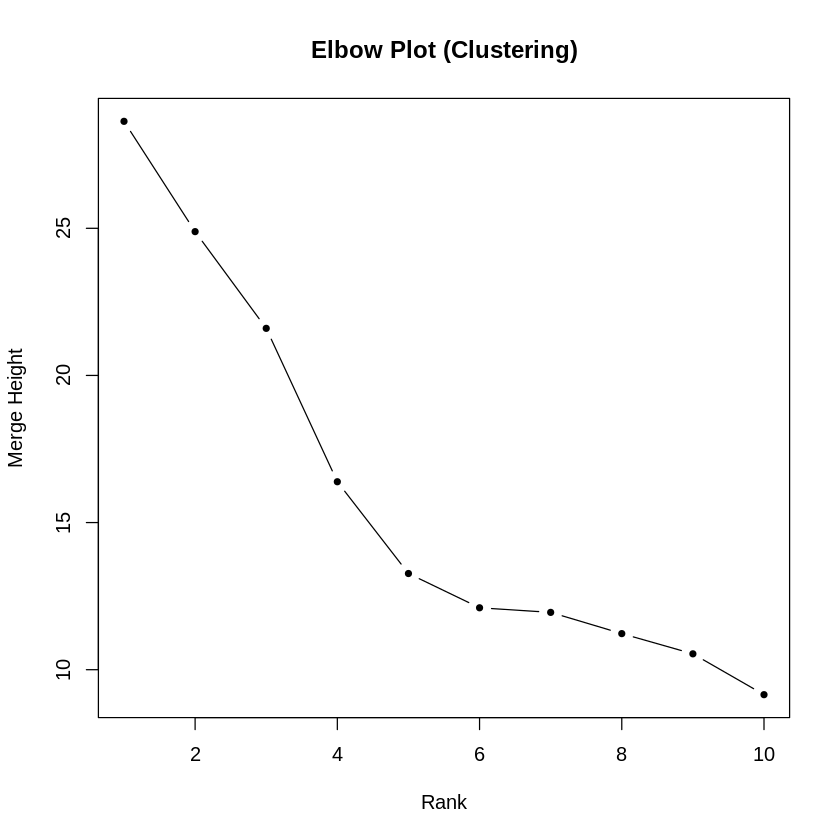

In [23]:
#Hierarchical clustering
seg_hclust <- hclust(dist(x_scaled), method = "complete")
x<- 1:10
y <- sort(seg_hclust$height, decreasing = TRUE)[1:10]

plot(x,y,type = "b", pch = 20,
     xlab = "Rank",
     ylab = "Merge Height",
     main = "Elbow Plot (Clustering)")

How many people are in each cluster?

In [24]:
k <- 6
seg_kmeans <- kmeans(x_scaled, centers = k)

segmentation_result <- seg%>%
  mutate(segment = seg_kmeans$cluster)

table(segmentation_result$segment)


  1   2   3   4   5   6 
133  55 874 268 134 536 

Interpretation: This means that the biggest cluster is Cluster 2

To save the progression

In [26]:
#Save our findings
write.csv(segmentation_result,
          "/content/segmentation_result.csv",
          row.names = FALSE)

          print("Progression saved")

[1] "Progression saved"


In [ ]:
#Now let's visualize our work

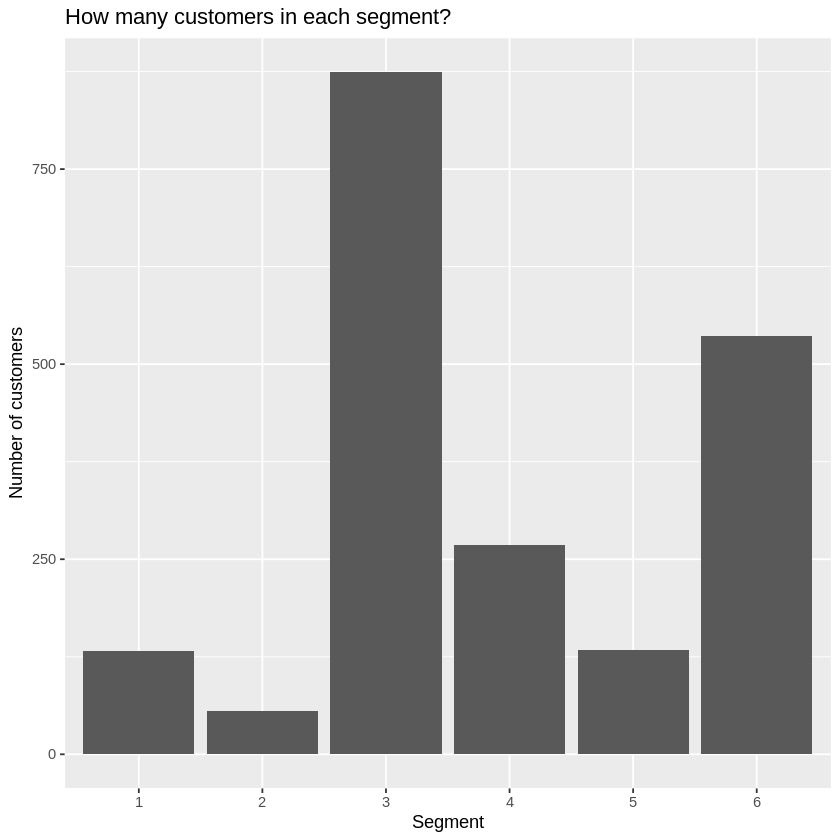

In [27]:
ggplot(segmentation_result, aes(x= factor(segment))) +
  geom_bar() +
    labs(title = "How many customers in each segment?",
     x = "Segment", y = "Number of customers")


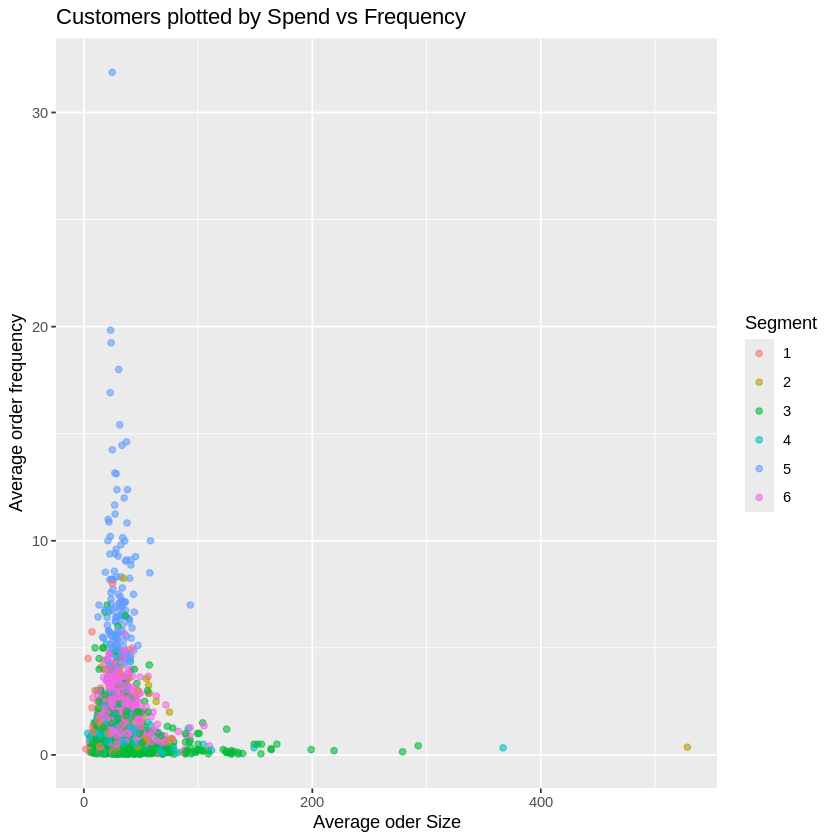

In [28]:
ggplot(segmentation_result,
       aes(x= avg_order_size, y = avg_order_freq, color = factor(segment))) +
         geom_point(alpha = 0.6) +
         labs(title = "Customers plotted by Spend vs Frequency",
         x= "Average oder Size", y = "Average order frequency",
         color = "Segment")